In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,97.910808,133.864673
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,97.688950,126.682999
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,99.857529,132.759433
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,99.370296,137.249347
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,98.355647,139.689707


## Exploratory Data Analysis

- Previously, we examined the various tables in the database to identify key variables, understand their relationships and determine which one   should be included in the final analysis
- In this phase of EDA, we will analyse the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with futher analysis
    
    

In [5]:
# summary statitics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


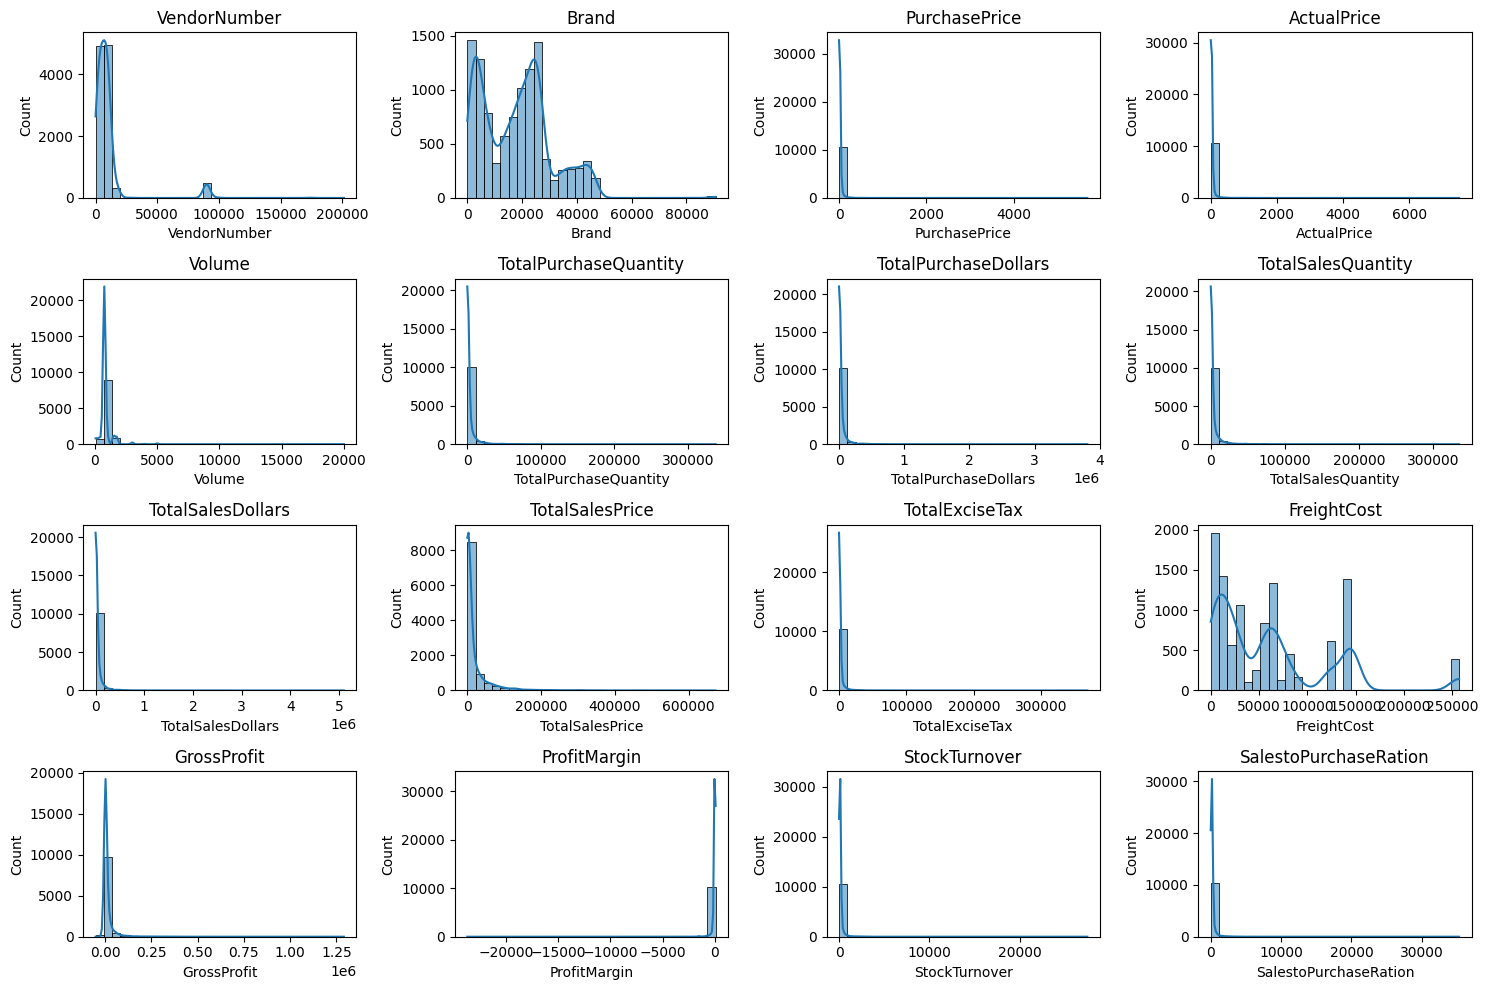

In [6]:
# Distribution plots for Numerical Columns
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

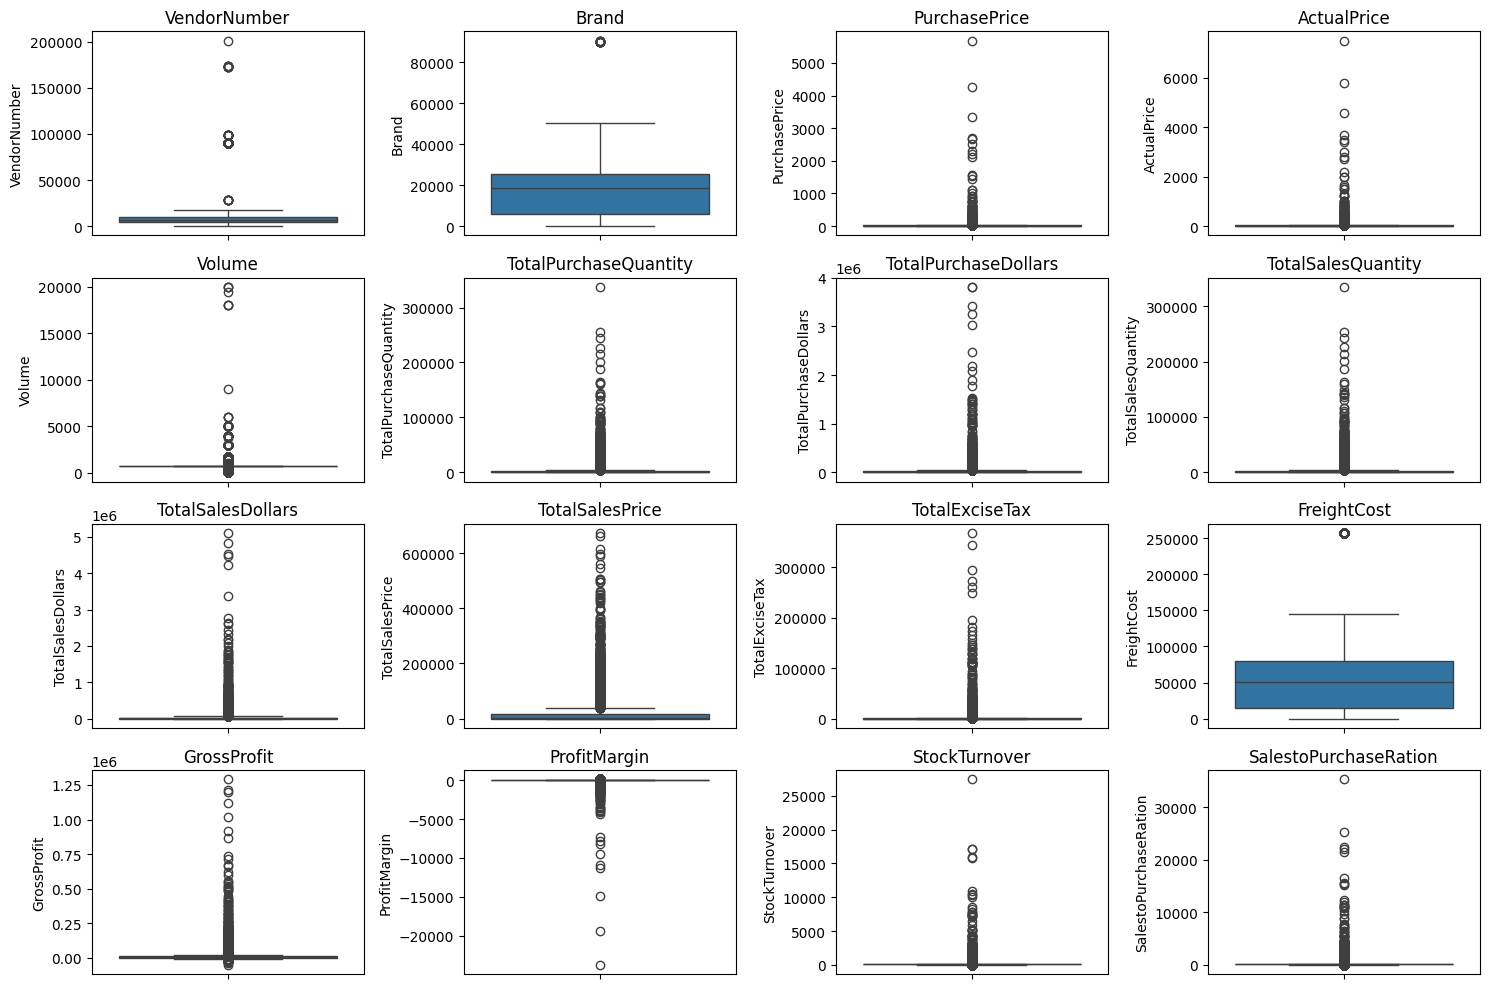

In [7]:
# outlier detection using Box-Plot
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights

#### Negative & Zero Values

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions must be sold at a loss due to high cost or sold at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -inf, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. This could be slow-moving or obsolete stock

#### Outlier Indicated by High Standard Deviations:

- Purchase & Actual Price: The max value (5,681.81 & 7,499,99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
- Freight Cost: Huge variation, from 0.09 to 257,032.07; suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than the purchased quantity, by sales being fulfilled by  older stock

In [9]:
# filter the data by removing inconsistencies

df = pd.read_sql_query(""" SELECT * from vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [10]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRation
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,97.910808,133.864673
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,97.688950,126.682999
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,99.857529,132.759433
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,99.370296,137.249347
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,98.355647,139.689707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,250.000000,604.166667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,2233.333333,2805.982906
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,100.000000,133.783784
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,7200.000000,9746.938776


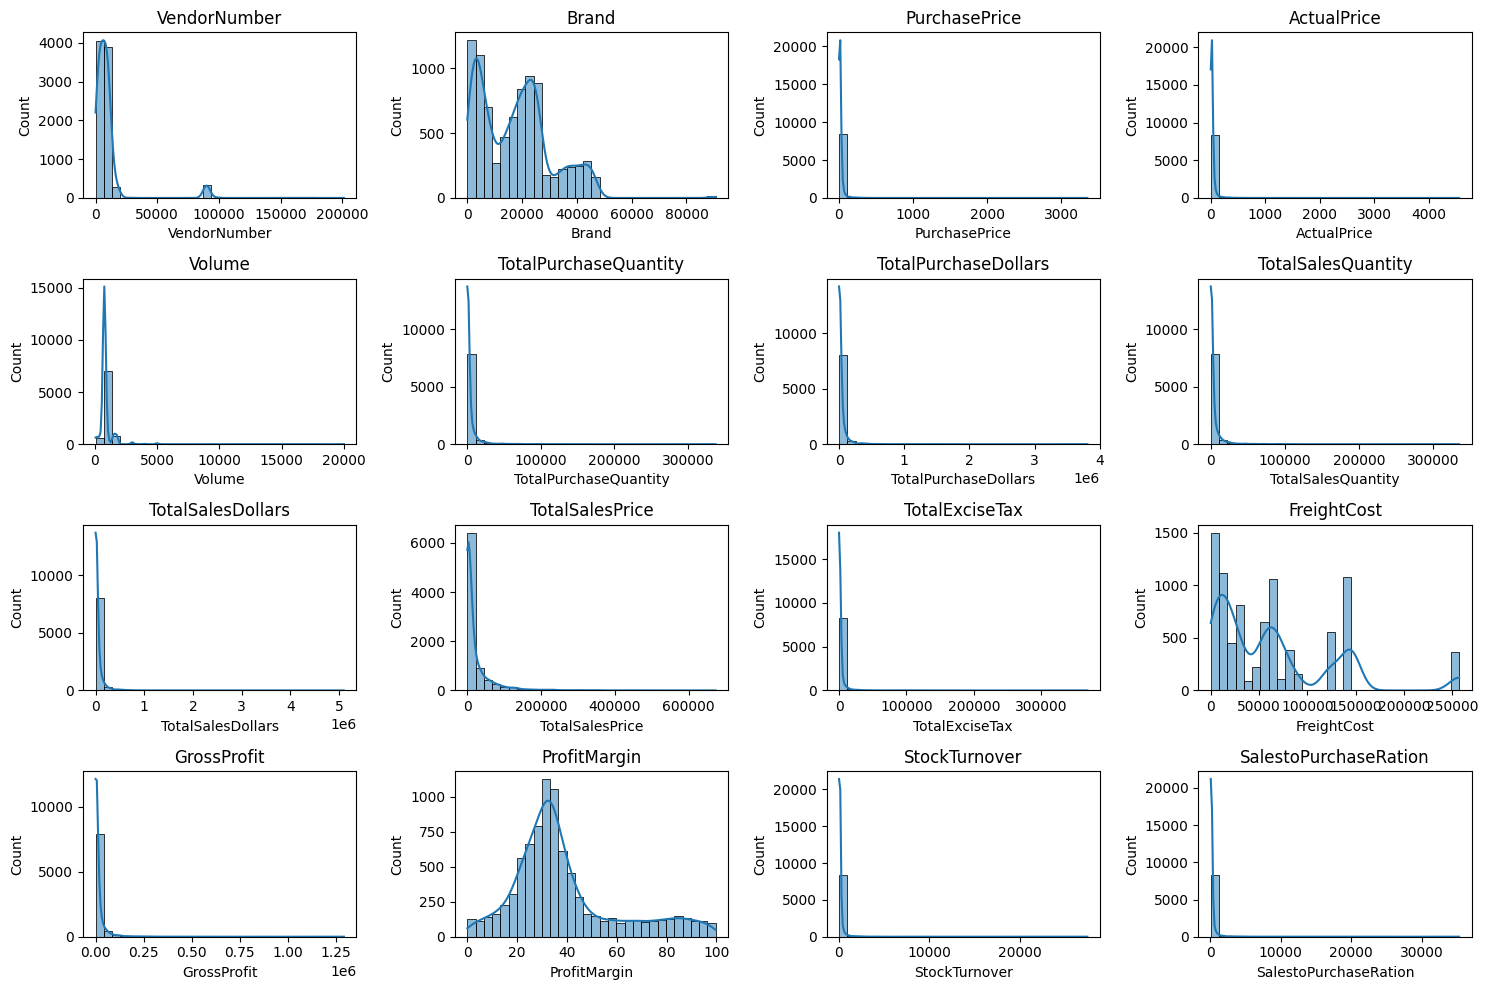

In [11]:
# Distribution plots for Numerical Columns
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

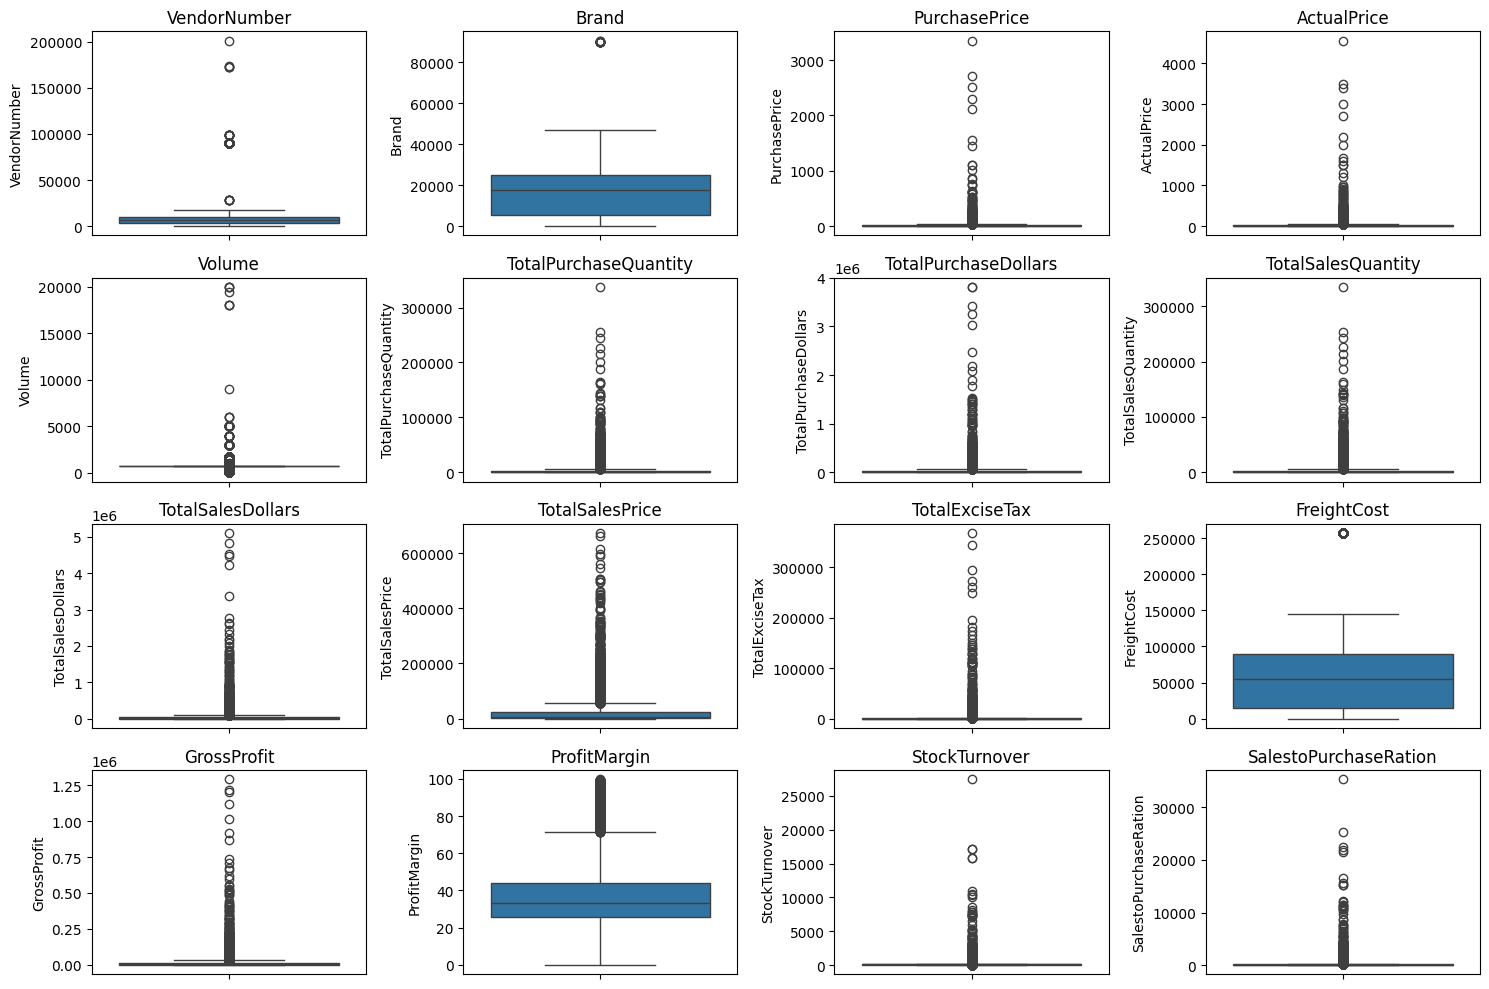

In [12]:
# outlier detection using Box-Plot
plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

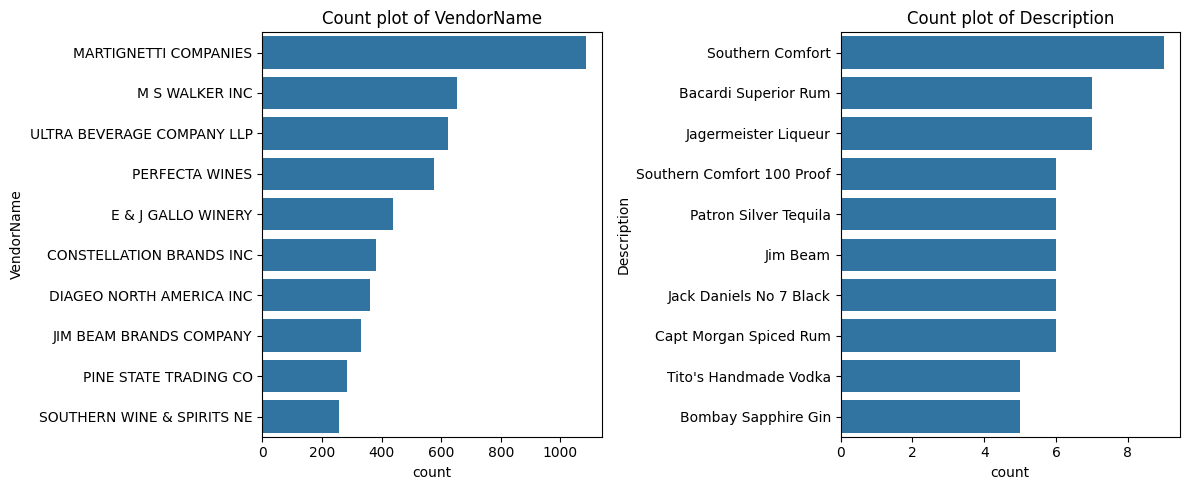

In [13]:
# count-plot for categorical columns
categorical_cols = ['VendorName', 'Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order = df[col].value_counts().index[:10]) # taking top 10 values
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

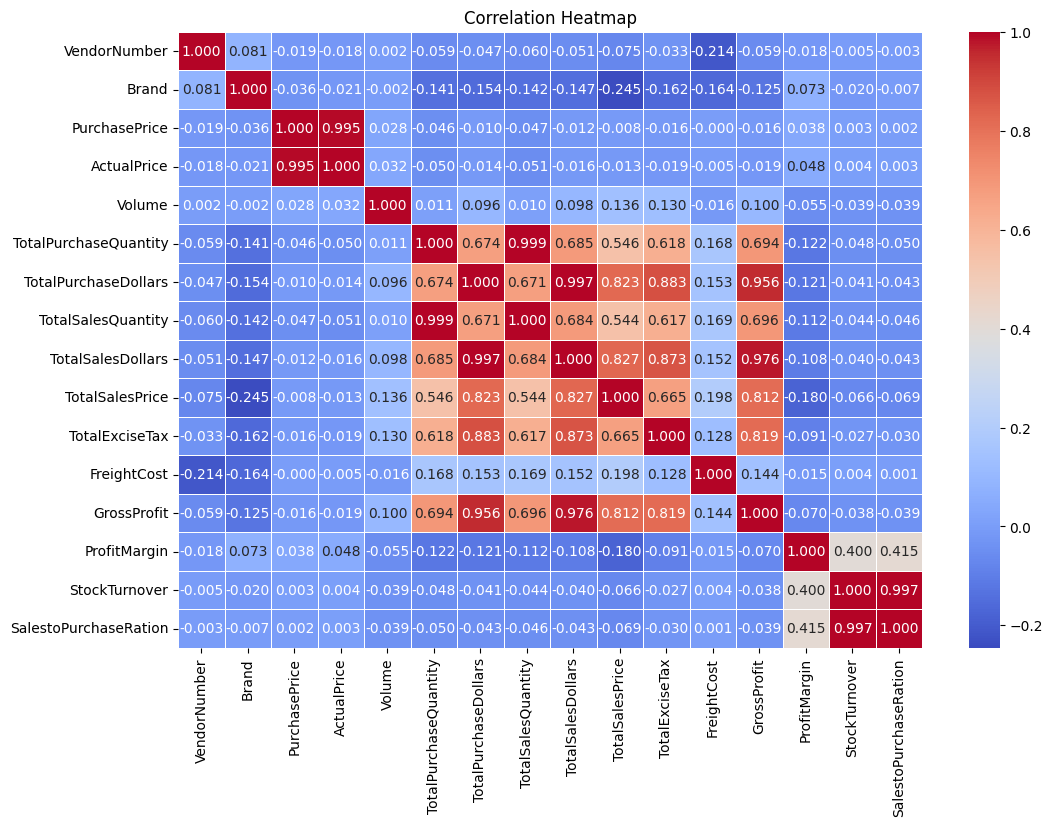

In [14]:
# Correlation Matrix
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot= True, fmt = '.3f', cmap = 'coolwarm', linewidths= 0.5 )
plt.title('Correlation Heatmap')
plt.show()

## Correlation Insights

- Purchase Price has a weak correlation with TotalSalesDollars(-0.012) and GrossProfit(-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
- Strong correlation between TotalPurchaseQuantity and TotalSalesQuantity(0.999), comforming efficient inventory turnover
- Negative Correlation between ProfitMargin & TotalSalesPrice(-0.179) suggests that as sales price increases, margin decreases, possibly due to competitive pricing pressure.
-  StockTurnover has weak negative correlations with GrossProfit(-0.038) and ProfitMargin(-0.055), indicating that faster turnover does not necessarily result in higher profitibility 

## Data Analysis

Identify Brands that need Promotional or Pricing Adjustments which exhibits lower sales performance but exhibit higher profit margins

In [18]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin' : 'mean'
}).reset_index()

In [19]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [20]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)


In [21]:
low_sales_threshold, high_margin_threshold

(560.299, 64.97017552750113)

In [22]:
# Filter brands with Low Sales but High Margins
target_brands = brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold ) &
(brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margin")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margin


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [23]:
brand_performance_1 = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

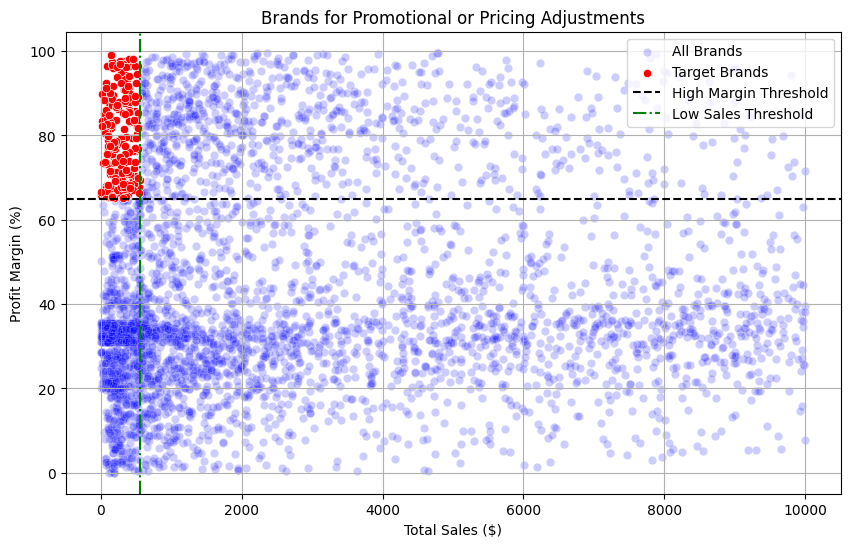

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = brand_performance_1, x='TotalSalesDollars', y='ProfitMargin', color='blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label = 'Target Brands')

plt.axhline(high_margin_threshold, linestyle = '--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle = '-.', color='green', label='Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title('Brands for Promotional or Pricing Adjustments')
plt.legend()
plt.grid(True)
plt.show()

Which vendors and brands demonstarte the highest sales performance?


In [26]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000 and value < 1_000_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)
    

In [27]:
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

In [28]:
print(top_brands,'\n\n', top_vendors)

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64 

 VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64


In [29]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [30]:
 top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

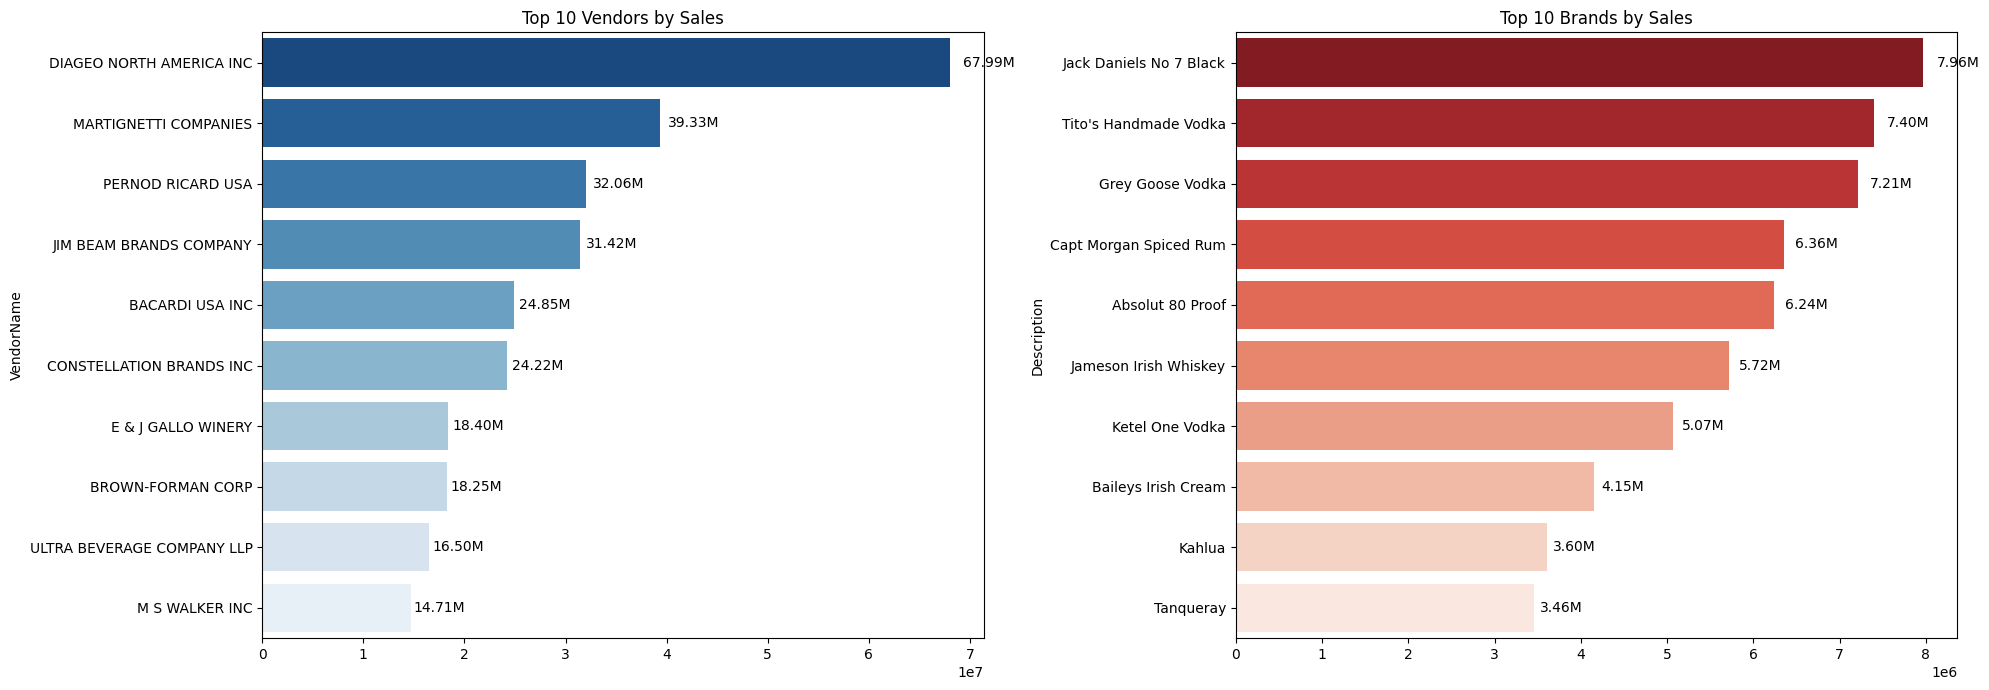

In [31]:
plt.figure(figsize=(20,7))

# Plot for top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x = top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black')


# Plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index, x = top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = 'left', va = 'center', fontsize = 10, color = 'black')


plt.tight_layout()
plt.show()


### Which Vendors contributes to Total Purchase Dollars?


In [33]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit' : 'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [34]:
vendor_performance['PurchaseContribution_%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() *100

In [35]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution_%', ascending= False), 2)

In [36]:
vendor_performance['GrossProfit'] = round(vendor_performance['GrossProfit'],2)

In [37]:
vendor_performance['TotalPurchaseDollars'] = vendor_performance['TotalPurchaseDollars'].astype('float64')

In [38]:
vendor_performance['TotalPurchaseDollars'] = vendor_performance['TotalPurchaseDollars'].apply(format_dollars)
vendor_performance['GrossProfit'] = vendor_performance['GrossProfit'].apply(format_dollars)
vendor_performance['TotalSalesDollars'] = vendor_performance['TotalSalesDollars'].apply(format_dollars)

In [39]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution_%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.2,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [40]:
top_vendors = vendor_performance.head(10)

In [41]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution_%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [42]:
top_vendors['PurchaseContribution_%'].sum()

65.69000000000001

In [43]:
top_vendors['Cumulative_Contribution_%'] = top_vendors['PurchaseContribution_%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution_%,Cumulative_Contribution_%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


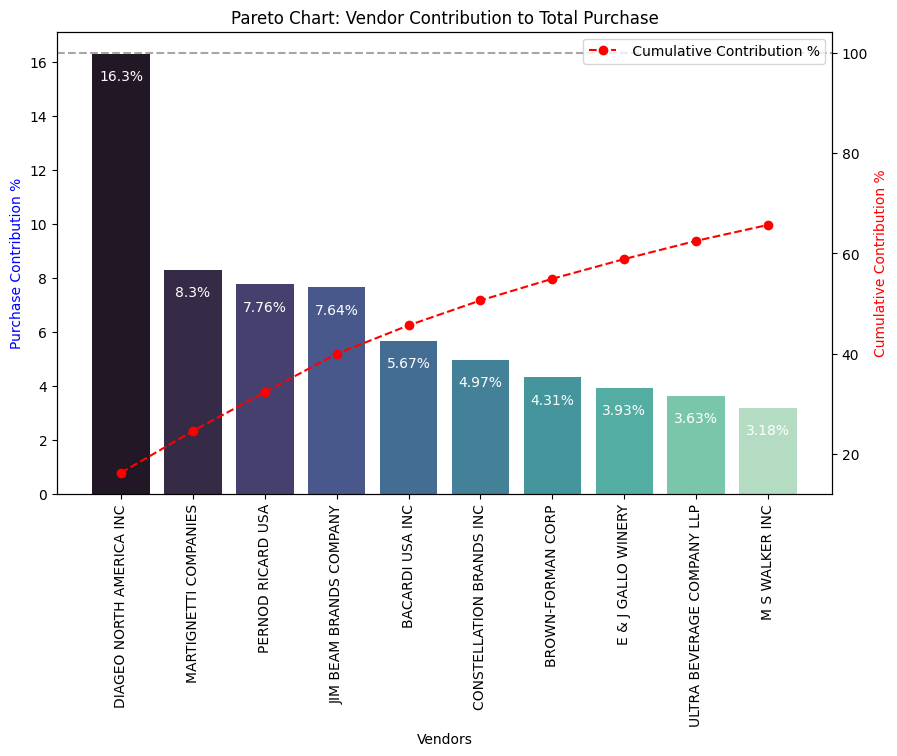

In [44]:
fit, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution_%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution_%']):
    ax1.text(i, value-1, str(value)+'%', ha='center', fontsize=10, color='white' )

# Line plot for cumulative contribution %
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution_%'], color='red', marker='o', linestyle = 'dashed', label=' Cumulative Contribution %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()


In [45]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution_%,Cumulative_Contribution_%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


## How much of the total procurment is dependent on the top vendors?


In [47]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution_%'].sum(), 2)}")

Total Purchase Contribution of top 10 vendors is 65.69


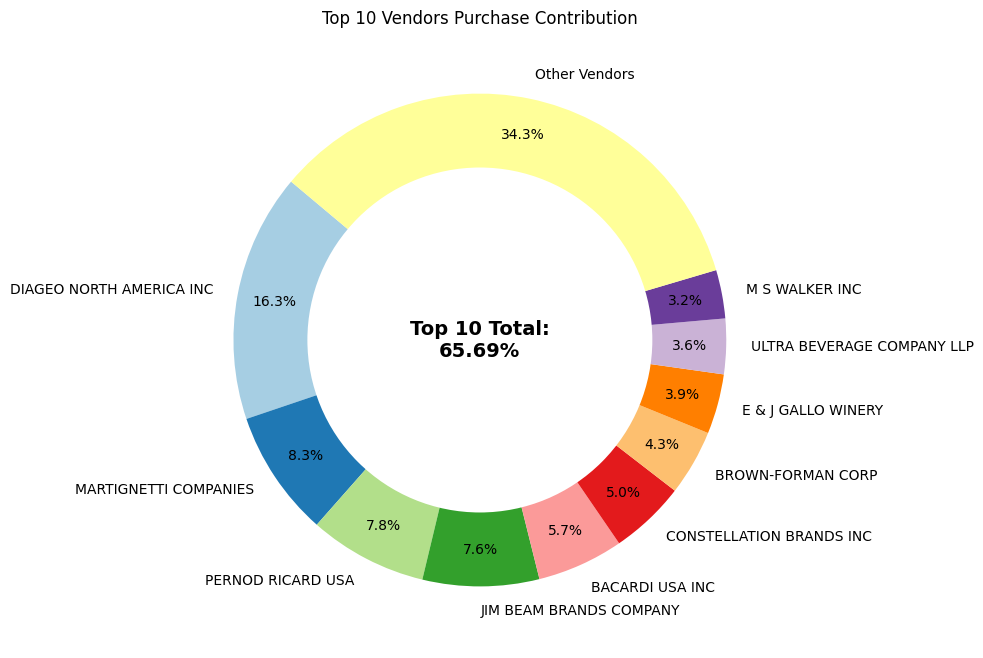

In [48]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution_%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append 'Other Vendors' category
vendors.append('Other Vendors')
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize = (8,8))
wedges, text, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct = '%1.1f%%',
                                startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

# Draw a white circle in the center to create a donut effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0,
         f"Top 10 Total:\n{total_contribution:.2f}%", 
         fontsize=14, 
fontweight='bold',
ha='center',
va='center')

plt.title('Top 10 Vendors Purchase Contribution')
plt.show()

Does purchasing in bulk reduce the unit price and what is the optimal purchase volume for cost savings?



In [50]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [51]:
df['Order_Size'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'] )

In [52]:
df.groupby('Order_Size')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
Order_Size,
Small,39.068186
Medium,15.486414
Large,10.777625


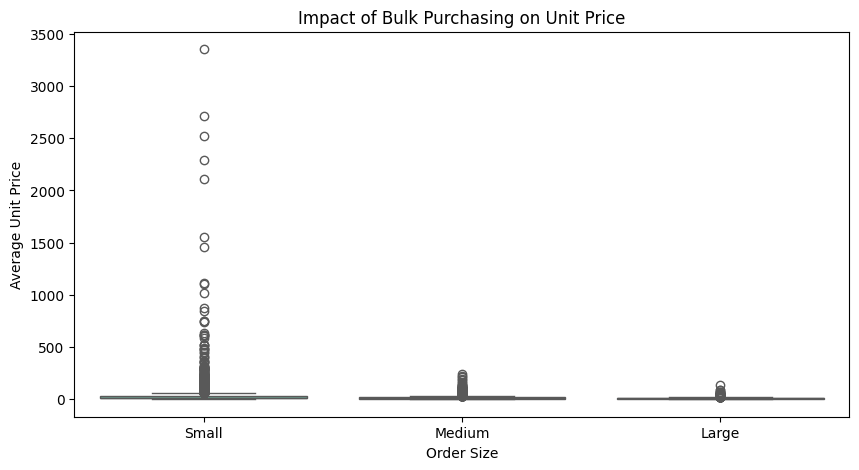

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Order_Size',y= 'UnitPurchasePrice', palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Price')
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest Unit Price ($10.78), meaning higher margins if they can manage inventory efficiently
- The price difference between small and large order is substantial(~72% reduction in unit price)
- This suggest that bulk pricing strategies successfully encourage vendors to purchase in large volumes, leading to higher overall sales despite lower per-unit revenue

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?


In [56]:
df[df['StockTurnover']<100].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,61.538462
HIGHLAND WINE MERCHANTS LLC,70.833333
PARK STREET IMPORTS LLC,75.130617
Circa Wines,75.567582
Dunn Wine Brokers,76.602213
...,...
DISARONNO INTERNATIONAL LLC,97.557729
"PREMIUM PORT WINES, INC.",97.607654
TY KU LLC,97.698246


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?


In [58]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [59]:
unsold_inventory_value_per_vendor = df.groupby('VendorName')[['UnsoldInventoryValue']].sum().reset_index()

In [156]:
# Sort vendors with the Highest Locked Capital
unsold_inventory_value_per_vendor = unsold_inventory_value_per_vendor.sort_values('UnsoldInventoryValue', ascending = False)
unsold_inventory_value_per_vendor['UnsoldInventoryValue'] = unsold_inventory_value_per_vendor['UnsoldInventoryValue']
unsold_inventory_value_per_vendor = unsold_inventory_value_per_vendor[(unsold_inventory_value_per_vendor['UnsoldInventoryValue%']> 0 )]
unsold_inventory_value_per_vendor['UnsoldInventoryValue%'] = unsold_inventory_value_per_vendor['UnsoldInventoryValue']/sum(unsold_inventory_value_per_vendor['UnsoldInventoryValue'])*100
unsold_inventory_value_per_vendor = round(unsold_inventory_value_per_vendor.sort_values('UnsoldInventoryValue%', ascending = False),2)


In [158]:
unsold_inventory_value_per_vendor = unsold_inventory_value_per_vendor[(unsold_inventory_value_per_vendor['UnsoldInventoryValue%']> 0 )]

In [161]:
top_unsold_vendors = unsold_inventory_value_per_vendor.head(10)
top_unsold_vendors['Cumulative_Unsold_Contribution_%'] = top_unsold_vendors['UnsoldInventoryValue%'].cumsum()
top_unsold_vendors

,VendorName,UnsoldInventoryValue,UnsoldInventoryValue%,Cumulative_Unsold_Contribution_%
25,DIAGEO NORTH AMERICA INC,722209.05,18.27,18.27
46,JIM BEAM BRANDS COMPANY,554665.63,14.03,32.30
68,PERNOD RICARD USA,470625.61,11.91,44.21
116,WILLIAM GRANT & SONS INC,401960.83,10.17,54.38
30,E & J GALLO WINERY,228282.61,5.78,60.16
79,SAZERAC CO INC,198436.41,5.02,65.18
11,BROWN-FORMAN CORP,177733.74,4.50,69.68
20,CONSTELLATION BRANDS INC,133617.62,3.38,73.06
61,MOET HENNESSY USA INC,126477.70,3.20,76.26
77,REMY COINTREAU USA INC,118598.15,3.00,79.26


In [163]:
top_unsold_vendors

,VendorName,UnsoldInventoryValue,UnsoldInventoryValue%,Cumulative_Unsold_Contribution_%
25,DIAGEO NORTH AMERICA INC,722209.05,18.27,18.27
46,JIM BEAM BRANDS COMPANY,554665.63,14.03,32.30
68,PERNOD RICARD USA,470625.61,11.91,44.21
116,WILLIAM GRANT & SONS INC,401960.83,10.17,54.38
30,E & J GALLO WINERY,228282.61,5.78,60.16
79,SAZERAC CO INC,198436.41,5.02,65.18
11,BROWN-FORMAN CORP,177733.74,4.50,69.68
20,CONSTELLATION BRANDS INC,133617.62,3.38,73.06
61,MOET HENNESSY USA INC,126477.70,3.20,76.26
77,REMY COINTREAU USA INC,118598.15,3.00,79.26


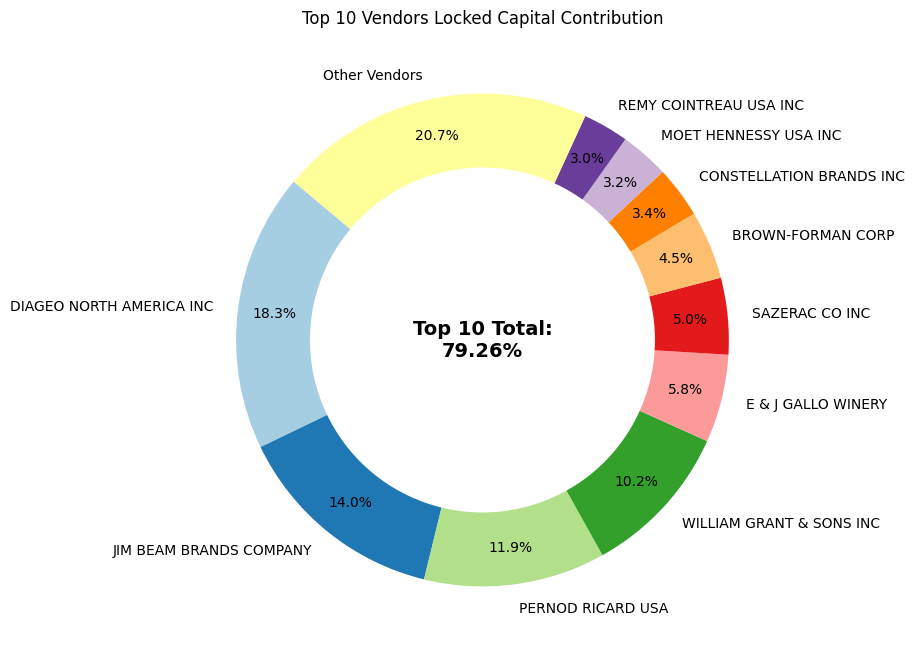

In [167]:
unsold_inventory_vendors = list(top_unsold_vendors['VendorName'].values)
unsold_inventory_contribution = list(top_unsold_vendors['UnsoldInventoryValue%'].values)
unsold_total_contribution = sum(unsold_inventory_contribution)
remaining_contribution = 100 - unsold_total_contribution

# Append 'Other Vendors' category
unsold_inventory_vendors.append('Other Vendors')
unsold_inventory_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize = (8,8))
wedges, text, autotexts = ax.pie(unsold_inventory_contribution, labels=unsold_inventory_vendors, autopct = '%1.1f%%',
                                startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

# Draw a white circle in the center to create a donut effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0,
         f"Top 10 Total:\n{unsold_total_contribution:.2f}%", 
         fontsize=14, 
fontweight='bold',
ha='center',
va='center')

plt.title('Top 10 Vendors Locked Capital Contribution')
plt.show()

What is 95% confidence intervals for profit margins of top-performing and low-performing vendors?

In [64]:
top_ven_threshold = df['TotalSalesDollars'].quantile(0.75)
low_ven_threshold = df['TotalSalesDollars'].quantile(0.25)


In [65]:
top_vendors_1 = df[df['TotalSalesDollars'] >= top_ven_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<= low_ven_threshold]['ProfitMargin'].dropna()

In [67]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1)/ np.sqrt(len(data)) # Standard Error
    t_critical = stats.t.ppf((1+confidence)/2, df=len(data)-1)
    margin_error = t_critical * std_err

    return mean_val, mean_val-margin_error, mean_val+margin_error

Top Vendors 95% CI: (30.74, 31.61), 31.18
Low Vendors 95% CI: (40.50, 42.64), 41.57


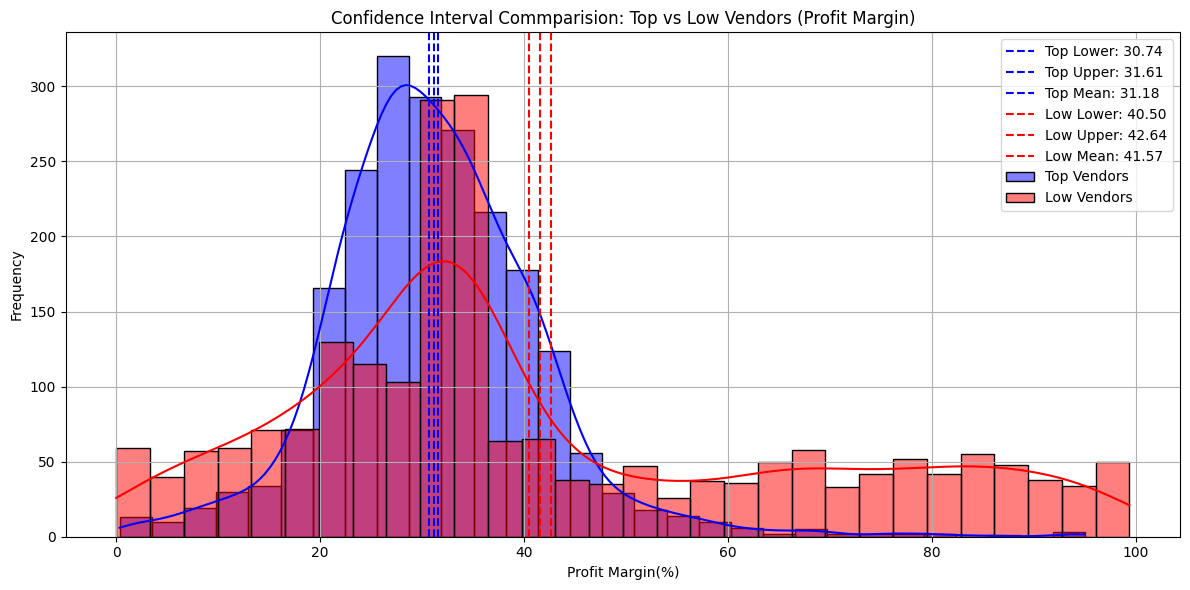

In [68]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors_1)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), {top_mean:.2f}')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), {low_mean:.2f}')

plt.figure(figsize=(12,6))

# Top vendors plot
sns.histplot(top_vendors_1, kde = True, color = 'blue', bins=30, alpha=0.5, label='Top Vendors')
plt.axvline(top_lower, color='blue', linestyle='--', label=f'Top Lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle='--', label=f'Top Upper: {top_upper:.2f}')
plt.axvline(top_mean, color='blue', linestyle='--', label=f'Top Mean: {top_mean:.2f}')

# Low vendor plot
sns.histplot(low_vendors, kde = True, color = 'red', bins=30, alpha=0.5, label='Low Vendors')
plt.axvline(low_lower, color='red', linestyle='--', label=f'Low Lower: {low_lower:.2f}')
plt.axvline(low_upper, color='red', linestyle='--', label=f'Low Upper: {low_upper:.2f}')
plt.axvline(low_mean, color='red', linestyle='--', label=f'Low Mean: {low_mean:.2f}')

# Finalise plot
plt.title('Confidence Interval Commparision: Top vs Low Vendors (Profit Margin)')
plt.xlabel('Profit Margin(%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors(40.50% to 42.64%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimisation, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?
Hypothesis:

$H_0$ (**Null Hypothesis**): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.  

$H_1$ (**Alternative Hypothesis**): The mean profit margins of top-performing and low-performing vendors are significantly different.


In [71]:
# Perform Two-Sample T-Test

t_stat, p_value = ttest_ind(top_vendors_1, low_vendors,  equal_var=False)

# Print Results
print(f'T-Statistics: {t_stat:.4f}, P-Value: {p_value:.4f}')
if p_value<0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low performing vendors.")
else:
    print('Fail to reject H₀: No Significant difference in profit margins.')

T-Statistics: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low performing vendors.


In [72]:
df.to_csv('vendor_sales_summary.csv', index=False)

In [228]:
# 1) Remove logs that block the rebase (Windows-safe)
import shutil, os
shutil.rmtree(r"logs\.ipynb_checkpoints", ignore_errors=True)
for f in ["logs/get_vendor_summary.log", "logs/ingestion_db.log"]:
    try: os.remove(f)
    except FileNotFoundError: pass


In [230]:
# 2) Rebase and push
!git fetch origin
!git rebase origin/main
!git push origin main


fatal: It seems that there is already a rebase-merge directory, and
I wonder if you are in the middle of another rebase.  If that is the
case, please try
	git rebase (--continue | --abort | --skip)
If that is not the case, please
	rm -fr ".git/rebase-merge"
and run me again.  I am stopping in case you still have something
valuable there.

To https://github.com/sagar-suchak/Vendor-Performance-Analysis.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'https://github.com/sagar-suchak/Vendor-Performance-Analysis.git'
hint: Updates were rejected because a pushed branch tip is behind its remote
hint: counterpart. If you want to integrate the remote changes, use 'git pull'
hint: before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [232]:
!git rebase --abort 2> NUL


In [234]:
import shutil, os
shutil.rmtree(".git/rebase-merge", ignore_errors=True)
print("Cleared .git/rebase-merge")


Cleared .git/rebase-merge


In [236]:
!git stash push -a -m "temp before rebase (include ignored)" 2> NUL


Saved working directory and index state On main: temp before rebase (include ignored)


In [238]:
!git fetch origin
!git rebase origin/main


Rebasing (1/2)
Rebasing (2/2)
Successfully rebased and updated refs/heads/main.
